In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math
import os
import glob
import keras

from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD

In [2]:
# Load and build raw data structures
equImages = []
equLabels = []
equImagesPath = './testImages/class_a'
for img in os.listdir(equImagesPath):
    i = cv2.imread(equImagesPath + "/" + img)
    iGrey = cv2.cvtColor(i, cv2.COLOR_RGB2GRAY)
    iResized = cv2.resize(iGrey, (64,64))
    iCanny = cv2.Canny(iResized, 100, 200)
    equImages.append(iCanny)
    equLabels.append(0)    
equX = np.asarray(equImages).reshape((len(equImages), 64, 64, 1)) 
equY = np.asarray(equLabels)

noEquImages = []
noEquLabels = []
noEquImagesPath = './testImages/class_b'
for img in os.listdir(noEquImagesPath):
    i = cv2.imread(noEquImagesPath + "/" + img)
    iGrey = cv2.cvtColor(i, cv2.COLOR_RGB2GRAY)
    iResized = cv2.resize(iGrey, (64,64))
    iCanny = cv2.Canny(iResized, 100, 200)
    noEquImages.append(iCanny)
    noEquLabels.append(1)    
noEquX = np.asarray(noEquImages).reshape((len(noEquImages), 64, 64, 1)) 
noEquY = np.asarray(noEquLabels)

# Stack the training data 
X = np.vstack((equX, noEquX)) 
X = X/255.0
y = np.hstack((equY, noEquY))



In [3]:
# Check shapes
print(equX.shape)
print(equY.shape)
print(noEquX.shape)
print(noEquY.shape)
print(X.shape)
print(y.shape)

(124, 64, 64, 1)
(124,)
(128, 64, 64, 1)
(128,)
(252, 64, 64, 1)
(252,)


In [4]:
# Split training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

print("Training data:")
print(X_train.shape)
print(y_train.shape)
print("Test data:")
print(X_test.shape)
print(y_test.shape)



Training data:
(201, 64, 64, 1)
(201,)
Test data:
(51, 64, 64, 1)
(51,)


0


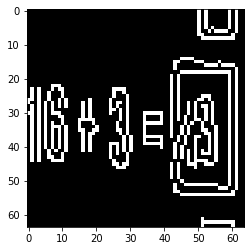

In [5]:
# Print random samples from training set
n = 20
plt.imshow(X_train[n], cmap='gray')
print(y_train[n])

1


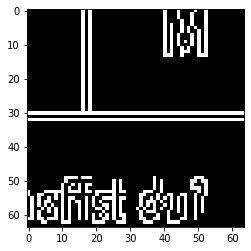

In [6]:
# Print random samples from test set
n = 2
plt.imshow(X_test[n], cmap='gray')
print(y_test[n])

In [7]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer with max pooling
model.add(Conv2D(15, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=(4,4)))
# convolutional layer with max pooling
model.add(Conv2D(2, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# convolutional layer with max pooling
#model.add(Conv2D(3, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))

# flatten output of conv
model.add(Flatten())
# hidden layer with dropout 
#model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.3))
# hidden layer with dropout 
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 15)        150       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 15)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 2)         272       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 2)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 72)                0         
                                                                 
 dense (Dense)               (None, 4)                 2

2022-07-25 22:56:02.285832: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# Train the model 
#opt = SGD(lr=0.01)
opt = "adam"
model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=8, epochs=100, validation_data=(X_test, y_test))


datagen = ImageDataGenerator(
        rotation_range=0, # rotation
        width_shift_range=0.01, # horizontal shift
        height_shift_range=0.01, # vertical shift
        zoom_range=0.01, # zoom
        horizontal_flip=False # horizontal flip
        #brightness_range=[0.2,1.2] # brightness
        )

#history = model.fit(datagen.flow(X_train, y_train, batch_size=8),steps_per_epoch=len(X_train)/8, 
#                     epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
26/26 [==============================] - 1s 16ms/step - loss: 0.6965 - accuracy: 0.4826 - val_loss: 0.6911 - val_accuracy: 0.5490
Epoch 2/100
26/26 [==============================] - 0s 10ms/step - loss: 0.6851 - accuracy: 0.5522 - val_loss: 0.6874 - val_accuracy: 0.5098
Epoch 3/100
26/26 [==============================] - 0s 9ms/step - loss: 0.6680 - accuracy: 0.6468 - val_loss: 0.6714 - val_accuracy: 0.6863
Epoch 4/100
26/26 [==============================] - 0s 9ms/step - loss: 0.6339 - accuracy: 0.7065 - val_loss: 0.6372 - val_accuracy: 0.6667
Epoch 5/100
26/26 [==============================] - 0s 9ms/step - loss: 0.5520 - accuracy: 0.7612 - val_loss: 0.5663 - val_accuracy: 0.6667
Epoch 6/100
26/26 [==============================] - 0s 9ms/step - loss: 0.4470 - accuracy: 0.8308 - val_loss: 0.4086 - val_accuracy: 0.8235
Epoch 7/100
26/26 [==============================] - 0s 9ms/step - loss: 0.3588 - accuracy: 0.8408 - val_loss: 0.3431 - val_accuracy: 0.8039
Epoch 8/100

26/26 [==============================] - 0s 10ms/step - loss: 0.0497 - accuracy: 0.9701 - val_loss: 0.6159 - val_accuracy: 0.8235
Epoch 59/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0552 - accuracy: 0.9602 - val_loss: 0.5222 - val_accuracy: 0.8235
Epoch 60/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0640 - accuracy: 0.9602 - val_loss: 0.5983 - val_accuracy: 0.8235
Epoch 61/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0760 - accuracy: 0.9751 - val_loss: 0.3509 - val_accuracy: 0.8824
Epoch 62/100
26/26 [==============================] - 0s 10ms/step - loss: 0.0609 - accuracy: 0.9652 - val_loss: 0.4333 - val_accuracy: 0.8431
Epoch 63/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0725 - accuracy: 0.9502 - val_loss: 0.6762 - val_accuracy: 0.8235
Epoch 64/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0510 - accuracy: 0.9801 - val_loss: 0.4250 - val_accuracy: 0.8235
Epoch 65/100
26/2

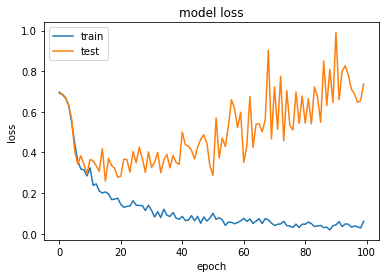

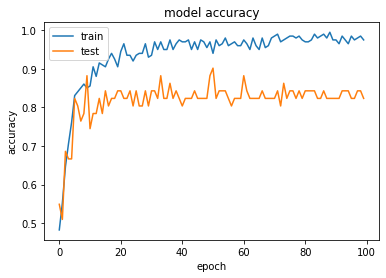

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

0
1/1 [==============================] - 0s 78ms/step
[[9.9993694e-01 6.3049229e-05]]


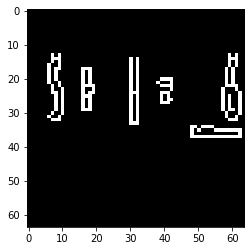

In [10]:
# Use the model to make predictions
n = 23
plt.imshow(X_train[n], cmap='gray')
print(y_train[n])
sample = X_train[n].reshape(1,64,64,1)

prediction = model.predict(sample)
print(prediction)

1
(1, 64, 64, 1)
1/1 [==============================] - 0s 14ms/step
[[5.453945e-07 9.999994e-01]]


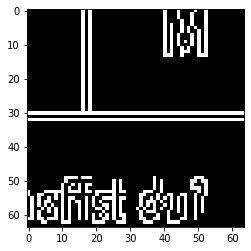

In [11]:

# Use the model to make predictions on the test test
n = 2
plt.imshow(X_test[n], cmap='gray')
print(y_test[n])
sample = X_test[n].reshape(1,64,64,1)
print(sample.shape)
prediction = model.predict(sample)
print(prediction)

In [12]:
# Save the model 
#history.model.save('equationClassifier.h5')
history.model.save('XXXequationClassifier.h5')